<a href="https://colab.research.google.com/github/paul-lestyo/Sistem-Rekomendasi-Buku/blob/main/Training_Recommender_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://yudiantosujana.com/files/books/books.csv
!wget https://yudiantosujana.com/files/books/users.csv
!wget https://yudiantosujana.com/files/books/ratings.csv

--2023-12-20 13:31:11--  https://yudiantosujana.com/files/books/books.csv
Resolving yudiantosujana.com (yudiantosujana.com)... 103.157.146.146
Connecting to yudiantosujana.com (yudiantosujana.com)|103.157.146.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75082046 (72M) [text/csv]
Saving to: ‘books.csv’

books.csv           100%[===================>]  71.60M  6.60MB/s    in 9.8s    

2023-12-20 13:31:22 (7.30 MB/s) - ‘books.csv’ saved [75082046/75082046]

--2023-12-20 13:31:22--  https://yudiantosujana.com/files/books/users.csv
Resolving yudiantosujana.com (yudiantosujana.com)... 103.157.146.146
Connecting to yudiantosujana.com (yudiantosujana.com)|103.157.146.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12858335 (12M) [text/csv]
Saving to: ‘users.csv’

users.csv           100%[===================>]  12.26M  2.69MB/s    in 4.6s    

2023-12-20 13:31:28 (2.69 MB/s) - ‘users.csv’ saved [12858335/12858335]

--2023-12-20 13:31

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**DATA UNDERSTANDING**

In [ ]:
books = pd.read_csv("books.csv")
books.info()

<ipython-input-3-79841515d3a5>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("books.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           271360 non-null  int64 
 1   ISBN                 271360 non-null  object
 2   Book-Title           271360 non-null  object
 3   Book-Author          271359 non-null  object
 4   Year-Of-Publication  271360 non-null  object
 5   Publisher            271358 non-null  object
 6   Image-URL-S          271360 non-null  object
 7   Image-URL-M          271360 non-null  object
 8   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(8)
memory usage: 18.6+ MB


In [ ]:
books.head()

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings = pd.read_csv("ratings.csv");
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Unnamed: 0   1149780 non-null  int64 
 1   User-ID      1149780 non-null  int64 
 2   ISBN         1149780 non-null  object
 3   Book-Rating  1149780 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 35.1+ MB


In [ ]:
ratings.head()

,Unnamed: 0,User-ID,ISBN,Book-Rating
0,0,276725,034545104X,0
1,1,276726,0155061224,5
2,2,276727,0446520802,0
3,3,276729,052165615X,3
4,4,276729,0521795028,6


In [ ]:
users = pd.read_csv("users.csv")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  278858 non-null  int64  
 1   User-ID     278858 non-null  int64  
 2   Location    278858 non-null  object 
 3   Age         168096 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.5+ MB


In [ ]:
users.head()

,Unnamed: 0,User-ID,Location,Age
0,0,1,"nyc, new york, usa",NaN
1,1,2,"stockton, california, usa",18.0
2,2,3,"moscow, yukon territory, russia",NaN
3,3,4,"porto, v.n.gaia, portugal",17.0
4,4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print("Banyak user :", users['User-ID'].nunique())
print("Banyak buku:", books['ISBN'].nunique())
print("Banyak rating:", ratings['Book-Rating'].count())
print("Banyak user yang melakukan rating buku:", ratings['User-ID'].nunique())
print("Banyak buku di rating:", ratings['ISBN'].nunique())

Banyak user : 278858
Banyak buku: 271360
Banyak rating: 1149780
Banyak user yang melakukan rating buku: 105283
Banyak buku di rating: 340556


<Axes: xlabel='Book-Rating', ylabel='count'>

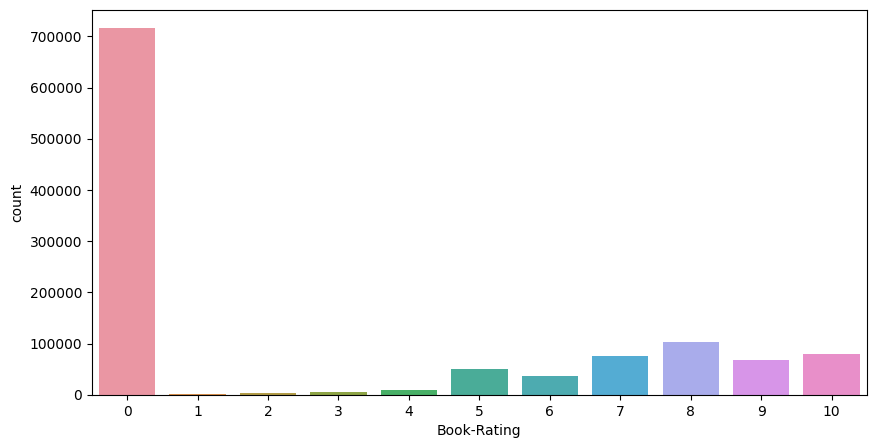

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=ratings['Book-Rating'])

In [ ]:
df =pd.DataFrame(ratings)

In [ ]:
print(df)

         Unnamed: 0  User-ID         ISBN  Book-Rating
0                 0   276725   034545104X            0
1                 1   276726   0155061224            5
2                 2   276727   0446520802            0
3                 3   276729   052165615X            3
4                 4   276729   0521795028            6
...             ...      ...          ...          ...
1149775     1149775   276704   1563526298            9
1149776     1149776   276706   0679447156            0
1149777     1149777   276709   0515107662           10
1149778     1149778   276721   0590442449           10
1149779     1149779   276723  05162443314            8

[1149780 rows x 4 columns]


In [ ]:
df = df.drop(df[df['Book-Rating'] == 0].index)

In [ ]:
print(df)

         Unnamed: 0  User-ID         ISBN  Book-Rating
1                 1   276726   0155061224            5
3                 3   276729   052165615X            3
4                 4   276729   0521795028            6
6                 6   276736   3257224281            8
7                 7   276737   0600570967            6
...             ...      ...          ...          ...
1149773     1149773   276704   0806917695            5
1149775     1149775   276704   1563526298            9
1149777     1149777   276709   0515107662           10
1149778     1149778   276721   0590442449           10
1149779     1149779   276723  05162443314            8

[433671 rows x 4 columns]


<Axes: xlabel='Book-Rating', ylabel='count'>

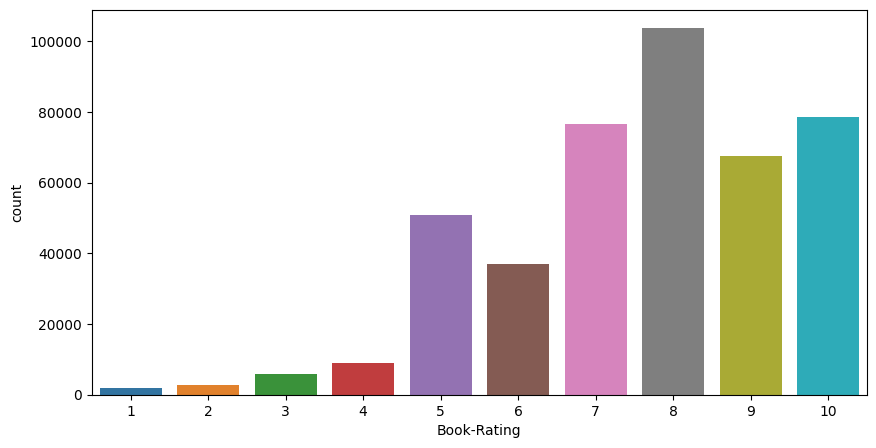

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Book-Rating'])

**Collaborative Filtering**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df.head()

,Unnamed: 0,User-ID,ISBN,Book-Rating
1,1,276726,0155061224,5
3,3,276729,052165615X,3
4,4,276729,0521795028,6
6,6,276736,3257224281,8
7,7,276737,0600570967,6


In [ ]:
df = pd.merge(df,books[['ISBN','Book-Title']], on='ISBN')
df.head()

,Unnamed: 0,User-ID,ISBN,Book-Rating,Book-Title
0,1,276726,0155061224,5,Rites of Passage
1,3,276729,052165615X,3,Help!: Level 1
2,4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
3,8,276744,038550120X,7,A Painted House
4,48815,11676,038550120X,10,A Painted House


In [ ]:
user_ids = df['User-ID'].unique().tolist()
# print('list User-ID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
# print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
# print('encoded angka ke userID: ', user_encoded_to_user)

In [ ]:
book_ids = df['ISBN'].unique().tolist()

book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}


In [ ]:
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['book'] = df['ISBN'].map(book_to_book_encoded)

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)

num_book = len(book_encoded_to_book)
print(num_book)

df['rating'] = df['Book-Rating'].values.astype(np.float32)

min_rating = min(df['rating'])
max_rating = max(df['rating'])

print('Number of User: {}, Number of book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

68091
149836
Number of User: 68091, Number of book: 149836, Min Rating: 1.0, Max Rating: 10.0


In [ ]:
df = df.sample(frac=1, random_state=42)
df

,Unnamed: 0,User-ID,ISBN,Book-Rating,Book-Title,user,book,rating
179544,383675,92979,0316313084,7,Annunciation : A Novel,4737,24406,7.0
243440,236003,54960,3570005755,7,Kinkerlitzchen: Neue Kille Kille Geschichten,53708,48873,7.0
158740,66492,13559,0030463262,8,"Robert Frost, a Tribute to the Source",42654,18897,8.0
199287,124946,28634,0312966539,6,Where the Bodies Are Buried (St. Martin's True...,114,31335,6.0
92366,25809,6251,0156189216,10,The Collected Stories of Eudora Welty,347,7368,10.0
...,...,...,...,...,...,...,...,...
259178,285765,68265,0881623717,10,Eye to Eye: How People Interact,7511,57058,10.0
365838,930312,225938,0833569228,8,Lakota Woman,4878,132535,8.0
131932,265611,61296,038531695X,10,The Ghost,24508,13432,10.0
146867,863566,208815,0842329242,10,Nicolae: The Rise of Antichrist (Left Behind N...,486,15890,10.0


In [ ]:
x = df[['user', 'book']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


In [ ]:
print(x, y)

[[ 4737 24406]
 [53708 48873]
 [42654 18897]
 ...
 [24508 13432]
 [  486 15890]
 [ 6044 11664]] [0.66666667 0.66666667 0.77777778 ... 1.         1.         1.        ]


In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
38385/38385 [==============================] - 322s 8ms/step - loss: 0.6126 - root_mean_squared_error: 0.2411 - val_loss: 0.5839 - val_root_mean_squared_error: 0.2100
Epoch 2/10
38385/38385 [==============================] - 331s 9ms/step - loss: 0.5713 - root_mean_squared_error: 0.1987 - val_loss: 0.5743 - val_root_mean_squared_error: 0.2017
Epoch 3/10
38385/38385 [==============================] - 319s 8ms/step - loss: 0.5596 - root_mean_squared_error: 0.1870 - val_loss: 0.5698 - val_root_mean_squared_error: 0.1978
Epoch 4/10
38385/38385 [==============================] - 319s 8ms/step - loss: 0.5519 - root_mean_squared_error: 0.1790 - val_loss: 0.5672 - val_root_mean_squared_error: 0.1954
Epoch 5/10
38385/38385 [==============================] - 319s 8ms/step - loss: 0.5463 - root_mean_squared_error: 0.1728 - val_loss: 0.5658 - val_root_mean_squared_error: 0.1942
Epoch 6/10
38385/38385 [==============================] - 317s 8ms/step - loss: 0.5418 - root_mean_squared_err

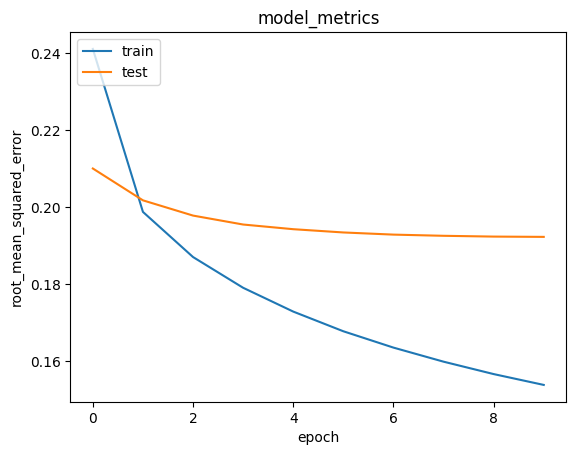

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
saved_model_path = "drive/MyDrive/Big-Data-Model/saved_model3"

model.save(saved_model_path, save_format="tf")

In [ ]:
book_df = books
df = pd.read_csv('ratings.csv')

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_watched_by_user = df[df['User-ID'] == user_id]

book_not_watched = book_df[~book_df['ISBN'].isin(book_watched_by_user['ISBN'].values)]['ISBN']
book_not_watched = list(
    set(book_not_watched)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_watched = [[book_to_book_encoded.get(x)] for x in book_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_watched), book_not_watched)
)

In [ ]:
ratings = model.predict(user_book_array).flatten()

4644/4644 [==============================] - 11s 2ms/step


In [ ]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_watched_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    ['ISBN'].values
)

book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row[3], '|', row[4])
    # print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row[3], '|', row[4])

Showing recommendations for users: 189334
book with high ratings from user
--------------------------------
General In His Labyrinth, The | GABRIEL GARCIA MARQUEZ
A Yuletide Universe: Sixteen Fantastical Tales | Brian M. Thomsen
SLEEP THIEVES | Stanley Coren
Confronting the Horror: the Aftermath of Violence | Wilma L. Derksen
Pop-Up Origamic Architecture | Masahiro Chatani
--------------------------------
Top 10 book recommendation
--------------------------------
The Authoritative Calvin and Hobbes (Calvin and Hobbes) | Bill Watterson
The Return of the King (The Lord of the Rings, Part 3) | J.R.R. TOLKIEN
The Return of the King (The Lord of The Rings, Part 3) | J. R. R. Tolkien
The Two Towers (The Lord of the Rings, Part 2) | J. R. R. Tolkien
The Giving Tree | Shel Silverstein
Calvin and Hobbes | Bill Watterson
52 Deck Series: 52 Ways to Celebrate Friendship | Lynn Gordon
My Sister's Keeper : A Novel (Picoult, Jodi) | Jodi Picoult
Dilbert: A Book of Postcards | Scott Adams
Harry Potte